# UV-Guider alignement with source in autocoll
##  Field 3

In [44]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division, print_function

import sys
sys.path.insert(1, './Calibration')

import numpy as np
from astropy.io import fits
from astropy import wcs, coordinates
from astropy import units as u
from astropy.wcs.utils import proj_plane_pixel_scales
from matplotlib import pyplot as plt
from astropy.table import Table
import matplotlib.patches as patches

from guider2UV.guider2UV import Guider2UV, diff_skycoord, fit_model, plot_fit

from Calibration.mapping import Mapping

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
cloudpath = '/home/dvibert/ownCloud/FIREBALL/'


## initialization from last xy calib

In [46]:
G2UV = Guider2UV(filename=cloudpath + 'TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/F3_180826_2.pkl')
print(G2UV)

FOV center angular position in guider <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.42402654, 36.43499699)>): (lon, lat) in deg
    [(0.17979887, -0.02325374)]>
FOV center pixel position in guider [array([1347.26210746]), array([450.73438835])]

Guider2UV object:
    Local Field Projector: 
ScienceMaskProjector object:
    LocalFrame: <SkyOffsetICRS Frame (rotation=-90.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (352.3424, 0.21245)>)>
    gamma: 1.0

    Guider Field Projector: 
GuiderMaskProjector object:
    LocalFrame: <SkyOffsetICRS Frame (rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.42402654, 36.43499699)>)>
    wcs: WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 250.424026537  36.4349969891  
CRPIX : 640.0  540.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.00024648264068189  0.00024664057706659  
NAXIS : 0  0

    mask_rotation: 44.2677914054

In [47]:
target_filename = '/home/dvibert/ownCloud/FIREBALL/Target_selection/targets_F3.txt'
F3 = Table.read(target_filename, format='ascii')

## Diffuse UV image

load new mapping

In [48]:
mask_det_map_file = cloudpath + 'TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/Detector_Mask_mappings/mapping-mask-det-180612-F3.pkl'
mask_det_map = Mapping(mask_det_map_file)
G2UV.set_detector_mapping(mask_det_map, offsets = [1., 1.])


## Scan sequence

gc - 41 - 42 - 32 - 30 - 9 - 4 - 10 - 13

In [49]:
#from guider2UV.guider2UV import Guider2UV
slits = ['41', '42', '32', '30', '9', '4', '10', '13'] 

movs, slits_coord = G2UV.compute_autocoll_moves_slits(slits, F3, hystcomp = True)

slit position in mm on mask: [ 9.692238 -4.486605]
slit position in mm on mask: [9.994533 2.641369]
slit position in mm on mask: [ 4.391899 -1.817091]
slit position in mm on mask: [3.484085 3.340942]
slit position in mm on mask: [-7.189261  3.964764]
slit position in mm on mask: [-9.632198 -3.583395]
slit position in mm on mask: [-6.784192 -4.273481]
slit position in mm on mask: [-5.32832  -2.571499]

targets local coords in siderostat local frame:
EL: 137.0 arcsec ; CE: 444.8 arcsec
EL: 440.1 arcsec ; CE: 453.5 arcsec
EL: 247.7 arcsec ; CE: 223.4 arcsec
EL: 466.1 arcsec ; CE: 183.1 arcsec
EL: 486.9 arcsec ; CE: -259.2 arcsec
EL: 164.9 arcsec ; CE: -356.6 arcsec
EL: 137.2 arcsec ; CE: -238.1 arcsec
EL: 210.3 arcsec ; CE: -178.6 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 137.0 arcsec ; CE 444.8 arcsec ; image: True
EL: 303.1 arcsec ; CE 8.7 arcsec ; image: True
EL: -192.5 arcsec ; CE -230.1 arcse

observed slits position :

In [50]:
slits_coord_obs_det = np.array([
       [1988.41878403,  106.44539382],
       [1508.6230669 ,   94.16400114],
       [1822.7014584 ,  516.16028525],
       [1477.52007584,  593.68117987],
       [1447.92426796, 1411.47702315],
       [1956.33276732, 1590.47665766],
       [2001.79997879, 1373.67216511],
       [1887.22774603, 1265.54090648],
# retour
       [1887.38268588, 1260.91895482],
       [2001.62796297, 1368.91605632],
       [1956.14587627, 1594.1909615 ],
       [1448.1237799 , 1417.47802767],
       [1477.68955404,  598.70432329],
       [1822.91909465,  521.68723695],
       [1508.25355969,   90.13554281],
       [1987.94755047,  102.14549882]])

slits_coord_obs_det

array([[1988.41878403,  106.44539382],
       [1508.6230669 ,   94.16400114],
       [1822.7014584 ,  516.16028525],
       [1477.52007584,  593.68117987],
       [1447.92426796, 1411.47702315],
       [1956.33276732, 1590.47665766],
       [2001.79997879, 1373.67216511],
       [1887.22774603, 1265.54090648],
       [1887.38268588, 1260.91895482],
       [2001.62796297, 1368.91605632],
       [1956.14587627, 1594.1909615 ],
       [1448.1237799 , 1417.47802767],
       [1477.68955404,  598.70432329],
       [1822.91909465,  521.68723695],
       [1508.25355969,   90.13554281],
       [1987.94755047,  102.14549882]])

In [51]:
valid = np.isfinite(slits_coord_obs_det[:,0])
obs_wave = G2UV.mask_det_map.w[0]
print("wave: ", obs_wave)

slits_coord_valid = [slits_coord[i] for i in np.nonzero(valid)[0]]
slits_valid = np.array(slits + slits[::-1])[valid]

wave:  0.20255


Text(0,0.5,'Ce arcsec')

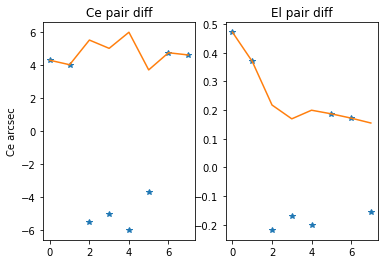

In [52]:
mid  = len(slits_coord_obs_det)//2
pair_diff = slits_coord_obs_det[:mid] - slits_coord_obs_det[::-1][:mid]
pair_diff
plt.figure()
plt.subplot('120')
plt.plot(pair_diff[:,0],'*')
plt.plot(np.abs(pair_diff[:,0]),'-')
plt.title("El pair diff")
plt.ylabel("El arcsec")
plt.subplot('121')
plt.plot(pair_diff[:,1],'*')
plt.plot(np.abs(pair_diff[:,1]),'-')
plt.title("Ce pair diff")
plt.ylabel("Ce arcsec")


In [53]:
slits_coord_obs = G2UV.detector2guider(slits_coord_obs_det, wave=obs_wave, angle=True  )


Fitting rotation, translation and magnification
gamma: 0.9989454166629014
theta: -40.67468466107567 arcmin
dx: 14.671103346670062 arcsec
dy: 1.3620474764048753 arcsec
variances: [3.73391028e-04 1.24378885e+00 3.30334925e-01 3.35781647e-01]

residuals in arcsec: [[ 0.33867091  0.63039789]
 [ 0.47797165  0.93185503]
 [-0.45555051 -0.87219076]
 [-1.46529235 -1.03970432]
 [ 0.35919206 -3.93731662]
 [ 1.31949616 -2.01008753]
 [-0.35022796  1.65963514]
 [-0.47285333  3.18485562]
 [-0.61137007 -1.95202791]
 [-0.0567475  -3.59530069]
 [ 1.48012079  2.12832775]
 [ 0.03841903  2.75226543]
 [-1.65891016  4.53827491]
 [-0.70185714  5.2720234 ]
 [ 0.88473358 -3.55884668]
 [ 0.87420483 -4.13216066]]
max residual in EL,CE 1.7, 5.3 arcsec
mean residual in EL,CE 0.9, 3.0 arcsec


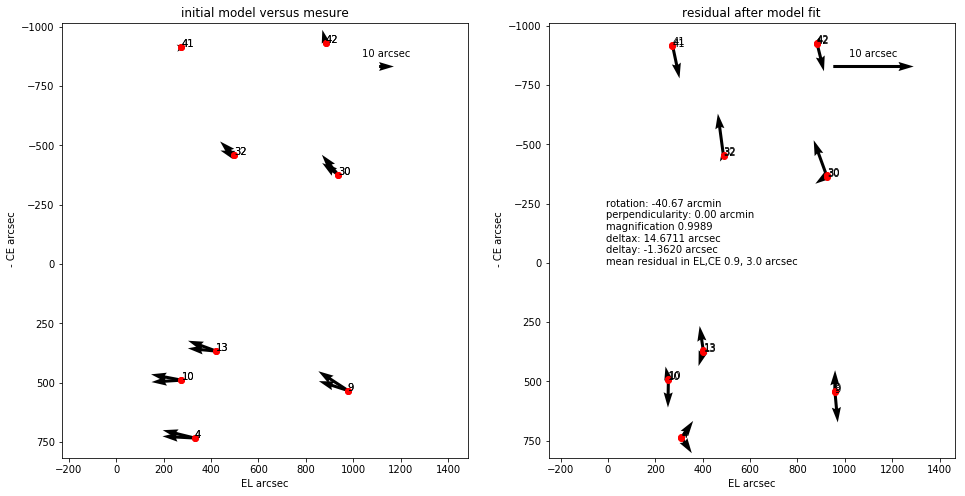

In [54]:
weight = np.array( [1.]*16  + [1./(1. + 1e-1)]*16)

G2UVcor = G2UV.update_model(slits_coord_valid, slits_coord_obs, labels=slits_valid, plot=True, weight=weight)

In [55]:
#G2UVcor.save(filename=cloudpath + 'TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/F3_180904.pkl')

Dumping to /home/dvibert/ownCloud/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/F3_180904.pkl


In [16]:
movs_new, slits_coord_new = G2UVcor.compute_autocoll_moves_slits(slits, F3, hystcomp = True)

slit position in mm on mask: [ 9.692238 -4.486605]
slit position in mm on mask: [9.994533 2.641369]
slit position in mm on mask: [ 4.391899 -1.817091]
slit position in mm on mask: [3.484085 3.340942]
slit position in mm on mask: [-7.189261  3.964764]
slit position in mm on mask: [-9.632198 -3.583395]
slit position in mm on mask: [-6.784192 -4.273481]
slit position in mm on mask: [-5.32832  -2.571499]

targets local coords in siderostat local frame:
EL: 138.8 arcsec ; CE: 445.2 arcsec
EL: 441.5 arcsec ; CE: 457.4 arcsec
EL: 252.0 arcsec ; CE: 225.4 arcsec
EL: 470.7 arcsec ; CE: 187.6 arcsec
EL: 496.8 arcsec ; CE: -254.0 arcsec
EL: 176.3 arcsec ; CE: -355.0 arcsec
EL: 147.3 arcsec ; CE: -236.8 arcsec
EL: 219.6 arcsec ; CE: -176.6 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 138.8 arcsec ; CE 445.2 arcsec ; image: True
EL: 302.7 arcsec ; CE 12.2 arcsec ; image: True
EL: -189.4 arcsec ; CE -232.0 arcs

## Star sequence

gc - s20 - s5 - s9 

In [17]:
star_target_path = cloudpath + 'Target_selection/GuidingStars/'
F3_stars = Table.read(star_target_path + "F3_guidingstars.fits", format='fits')

stars = [20, 5, 9]


star_movs, stars_coord = G2UVcor.compute_autocoll_move_stars(stars, F3_stars, hystcomp = True)


star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(352.387774, -0.111235)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(352.228576, -0.041124)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(352.267202, 0.107397)]>

targets local coords in siderostat local frame:
EL: -251.5 arcsec ; CE: 123.6 arcsec
EL: -126.0 arcsec ; CE: -154.9 arcsec
EL: 140.4 arcsec ; CE: -87.6 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: -251.5 arcsec ; CE 123.6 arcsec ; image: True
EL: 125.4 arcsec ; CE -278.5 arcsec ; image: True
EL: 266.4 arcsec ; CE 67.3 arcsec ; image: True
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: False
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: True
EL: -266.4 arcsec ; CE -97.3 arcsec ; image: False
EL: 0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: -125.4 arcsec ; CE 308.5 arcsec ; image: False
EL: -0.0 arcsec ; CE -30.0 arcsec ; image: True
EL: 251.5 a

In [18]:
stars_coord

[<SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.42402654, 36.43499699)>): (lon, lat) in deg
     [(-0.14022818, -0.07069044)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.42402654, 36.43499699)>): (lon, lat) in deg
     [(-0.07028362, 0.08858072)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.42402654, 36.43499699)>): (lon, lat) in deg
     [(0.07827793, 0.05010985)]>]

------------------------------------------------------

# Quasar stars

In [23]:
from guider2UV.MaskAstrometry import LocalScienceMaskProjector

G2UV_QSO = G2UVcor.copy()

Field_center = coordinates.SkyCoord(270.52256162*u.deg, 44.0392496*u.deg)
Field_rotation = 110.09593332038546*u.deg
Field_gamma = G2UVcor.FieldP.gamma

FieldP_QSO = LocalScienceMaskProjector(Field_center, Field_rotation, Field_gamma)

G2UV_QSO.FieldP = FieldP_QSO

In [24]:
print(G2UV_QSO)


Guider2UV object:
    Local Field Projector: 
ScienceMaskProjector object:
    LocalFrame: <SkyOffsetICRS Frame (rotation=20.095933320385456 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (270.52256162, 44.0392496)>)>
    gamma: 0.9989454166629014

    Guider Field Projector: 
GuiderMaskProjector object:
    LocalFrame: <SkyOffsetICRS Frame (rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.42402654, 36.43499699)>)>
    wcs: WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 250.424026537  36.4349969891  
CRPIX : 640.0  540.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.00024648264068189  0.00024664057706659  
NAXIS : 0  0

    mask_rotation: 3.593106744344041 arcmin
    FOV center in guider: [1361.01487994]x[444.15399857] pix



In [41]:
star_target_path = cloudpath + 'Target_selection/GuidingStars/'

#Table.read(star_target_path + "F3_guidingstars.fits", format='fits')

QSO_stars_radec = np.array([[270.238893, 44.214653], # Mag 8.5
                        [270.215559,44.119755]]) # Mag 8.7

QSO_stars_table = Table(QSO_stars_radec, names=[ 'RA', 'DEC'])
QSO_stars_table['Internal count'] = [1,2]

stars = [1,2]
star_movs, stars_coord = G2UV_QSO.compute_autocoll_move_stars(stars, QSO_stars_table, hystcomp = True)


star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(270.238893, 44.214653)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(270.215559, 44.119755)]>

targets local coords in siderostat local frame:
EL: -122.0 arcsec ; CE: -122.3 arcsec
EL: -92.1 arcsec ; CE: 43.6 arcsec

siderostat moves sequence: 
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: False
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: True
EL: -122.0 arcsec ; CE -122.3 arcsec ; image: True
EL: 29.9 arcsec ; CE 166.0 arcsec ; image: True
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: False
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: True
EL: -29.9 arcsec ; CE -196.0 arcsec ; image: False
EL: 0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 122.0 arcsec ; CE 122.3 arcsec ; image: True


In [43]:
stars_radec_coord = coordinates.SkyCoord(QSO_stars_radec[:,0]*u.deg, QSO_stars_radec[:,1]*u.deg)

QSO_stars_pos_guider_pix = G2UV_QSO.SienceMask2guider(stars_radec_coord, world=True, angle=False)
print(QSO_stars_pos_guider_pix)

[array([360.97637173, 430.05207998]), array([828.83300343, 437.60340627])]


In [37]:
#star_target_path = cloudpath + 'Target_selection/GuidingStars/'

#Table.read(star_target_path + "F3_guidingstars.fits", format='fits')

from astropy.table import Column
QSO_stars_radec = np.array([[270.238893, 44.214653], # Mag 8.5
                        [270.215559,44.119755]]) # Mag 8.7

QSO_stars_table = Table(QSO_stars_radec, names=[ 'RA', 'DEC'])
QSO_stars_table['Internal count'] = [1,2]

In [38]:
QSO_stars_table

RA,DEC,Internal count
float64,float64,int64
270.238893,44.214653,1
270.215559,44.119755,2
